## Observations and Insights

## Dependencies and starter code

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
merged_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Grouping by Drug Regimen, caclulate mean for each regimen.
summary_stats_mean = merged_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()

# Grouping by Drug Regimen, calculate median for each regimen.
summary_stats_median = merged_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()

# Grouping by Drug Regimen, calculate variance for each regimen.
summary_stats_variance = merged_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()

# Grouping by Drug Regimen, calculate standard deviation for each regimen.
summary_stats_std = merged_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()

# Grouping by Drug Regimen, calculate the SEM (Standard Error of the Mean) for each regimen
summary_stats_sem = merged_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

# Combine summary stats into one summary dataframe and rename columns.
summary_stats_df = summary_stats_mean.to_frame().join(summary_stats_median, lsuffix=" Mean", rsuffix=" Median")
summary_stats_df = summary_stats_df.join(summary_stats_variance)
summary_stats_df = summary_stats_df.rename(columns={ "Tumor Volume (mm3)": "Tumor Volume (mm3) Variance"})
summary_stats_df = summary_stats_df.join(summary_stats_std)
summary_stats_df = summary_stats_df.rename(columns={ "Tumor Volume (mm3)": "Tumor Volume (mm3) Standard Deviation"})
summary_stats_df = summary_stats_df.join(summary_stats_sem)
summary_stats_df = summary_stats_df.rename(columns={ "Tumor Volume (mm3)": "Tumor Volume (mm3) SEM"})

summary_stats_df

,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) Standard Deviation,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

           Drug Regimen Data Count
Capomulin                      230
Ramicane                       228
Ketapril                       188
Naftisol                       186
Zoniferol                      182
Stelasyn                       181
Placebo                        181
Infubinol                      178
Ceftamin                       178
Propriva                       161


[]

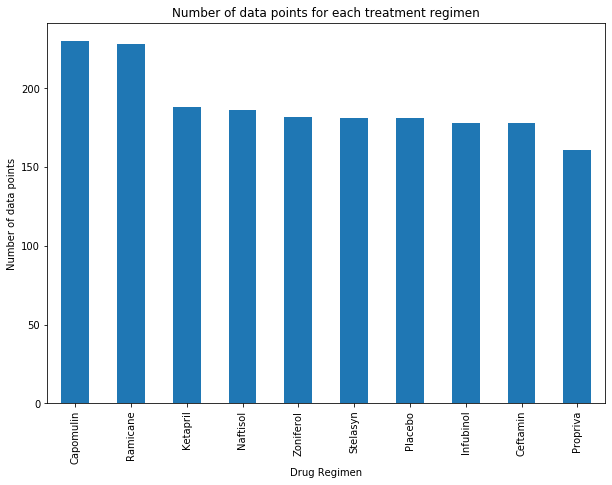

In [15]:
# Use valuecounts to get a total of regimen 
data_per = merged_df["Drug Regimen"].value_counts()

# Convert to dataframe 
data_points_df = pd.DataFrame(data_per)

# Rename columns 
data_points_df = number_points_df.rename(columns={
    "Regimen": "Drug Regimen Count"})

# Print the dataframe
print(number_points_df)

# Create bar chart using pandas and add axis titles 
pandas_plot = data_per.plot(kind="bar", figsize=(10,7))
pandas_plot.set_title("Number of data points for each treatment regimen")
pandas_plot.set_ylabel("Number of data points")
pandas_plot.set_xlabel("Drug Regimen")

pandas_plot.plot()

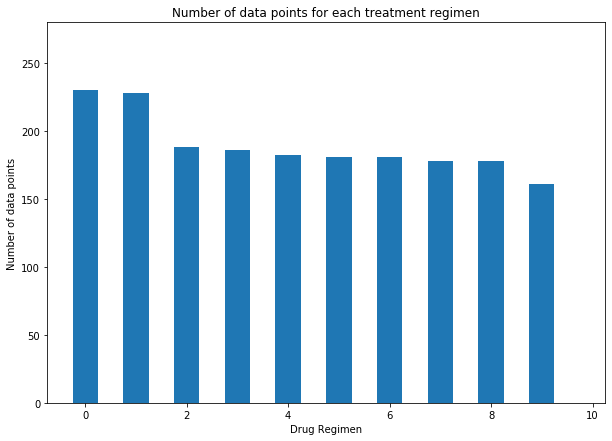

In [20]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.figure(figsize= (10,7))

# Create bar chart using matplotlib pyplot.

x_axis = np.arange(len(number_points_df))
plt.bar(x_axis, data_points_df["Drug Regimen Data Count"], align="center", width=0.50)

# Add labels for axes and add a title for the graph.
plt.xlabel("Drug Regimen")
plt.ylabel("Number of data points")
plt.title("Number of data points for each treatment regimen")

# Configure limits for x-axis and y-axis
plt.xlim(-0.75, len(number_points_df)+0.25)
plt.ylim(0, max(number_points_df["Drug Regimen Data Count"])+50)

# Show plot
plt.show()

## Pie plots

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64


[]

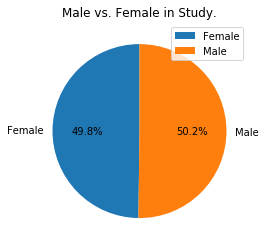

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Group by mouse gender 
mouse_gender = merged_df.groupby(['Sex'])['Mouse ID'].nunique()
print(mouse_gender)

# Create pie chart using pandas.
pandas_plot = mouse_gender.plot(kind="pie", y="Mouse ID", startangle=90, autopct="%1.1f%%")

# Add labels for axes and add a title for the graph.
pandas_plot.set_title("Male vs. Female in Study.")
pandas_plot.set_ylabel('')
pandas_plot.legend(loc='best')
pandas_plot.plot()

        Mouse ID
Sex             
Female       124
Male         125


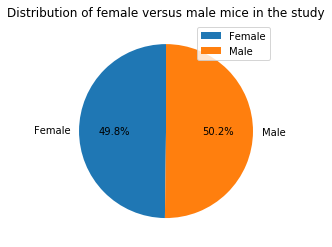

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_df = pd.DataFrame(mouse_gender)

# Print the dataframe
print(gender_df)

# Labels for the sections of our pie chart
labels = list(gender_df.index.values)

# The values of each section of the pie chart
sizes = list(gender_df.loc[:, "Mouse ID"])

# Plot using matplotlib
plt.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=False, startangle=90)
plt.title("Distribution of female versus male mice in the study")
plt.legend(loc="best")
plt.show()

## Quartiles, outliers and boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
best_mice = merged_df.set_index("Drug Regimen")

# Filter list to only include drug regimen of Capomulin
best_mice = best_mice.loc["Capomulin", ["Mouse ID", "Tumor Volume (mm3)"]]

# Store a selected mouse as variable and get data
mouse_id = "s185"
mouse_s185 = merged_df.loc[merged_df["Mouse ID"] == mouse_id, ["Timepoint", "Tumor Volume (mm3)"]]
print(mouse_s185)

    Timepoint  Tumor Volume (mm3)
10          0           45.000000
11          5           43.878496
12         10           37.614948
13         15           38.177232
14         20           36.866876
15         25           33.949940
16         30           32.959671
17         35           28.328531
18         40           25.472143
19         45           23.343598


Text(0.5, 1.0, '')

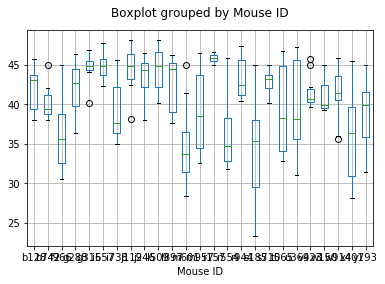

In [40]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
best_mice.boxplot(column='Tumor Volume (mm3)', by='Mouse ID')
plt.title("")


## Line and scatter plots

Text(0.5, 1.0, 'Tumor Volume (mm3) Over Time for Mouse s185 (treated with Capomulin)')

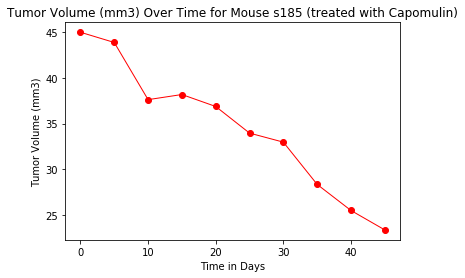

In [41]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
plt.plot(mouse_s185["Timepoint"], mouse_s185["Tumor Volume (mm3)"], linewidth=1, color="red", marker="o")

# Add labels to axes and add title for graph.
plt.xlabel("Time in Days")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume (mm3) Over Time for Mouse s185 (treated with Capomulin)")

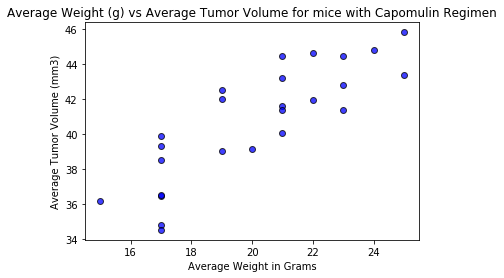

In [45]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_mice = merged_df.set_index("Drug Regimen")

capomulin_mice = capomulin_mice.loc["Capomulin"]

capomulin_mice = capomulin_mice.groupby(["Mouse ID"])["Weight (g)", "Tumor Volume (mm3)"].mean()

capomulin_mice = capomulin_mice.rename(columns={
    "Weight (g)": "Average Weight in Grams",
    "Tumor Volume (mm3)": "Average Tumor Volume (mm3)"
})

x_values = capomulin_mice["Average Weight in Grams"]
y_values = capomulin_mice["Average Tumor Volume (mm3)"]
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

plt.xlabel("Average Weight in Grams")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Weight (g) vs Average Tumor Volume for mice with Capomulin Regimen")
plt.show()

The correlation between both average weight (g) and average tumor volume (mm3) is 0.84
The r-squared value is: 0.7088568047708717


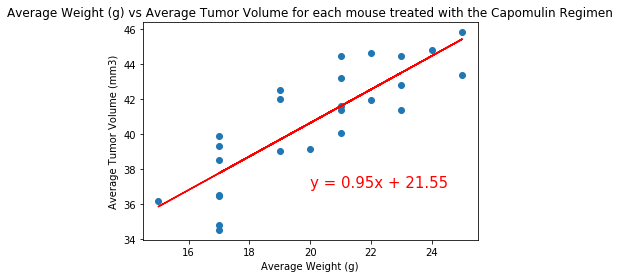

In [46]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both average weight (g) and average tumor volume (mm3) is {round(correlation[0],2)}")

# Calculate linear regression for average mouse weight and average tumor volume.
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

print(f"The r-squared value is: {rvalue ** 2}")

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Average Weight (g) vs Average Tumor Volume for each mouse treated with the Capomulin Regimen")
plt.show()